***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [5]:
dados = pd.read_csv("dados.csv")

### Visualize o conteúdo do DataFrame

In [6]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [7]:
sm = 788
intervalo = [dados['Renda'].min(), 2*sm, 5*sm, 15*sm, 25*sm, dados['Renda'].max()]
intervalo

[0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [8]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [9]:
frequencia_absoluta = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=intervalo,
        labels=labels,
        include_lowest=True)
)
frequencia_absoluta

Renda
E    49755
D    18602
C     7241
B      822
A      420
Name: count, dtype: int64

### 4º Construir a coluna de percentuais

In [10]:
frequencia_relativa = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=intervalo,
        labels=labels,
        include_lowest=True),
    normalize=True
)
frequencia_relativa

Renda
E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: proportion, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [11]:
distribuicao_frequencia = pd.DataFrame({'Frequencia Absoluta': frequencia_absoluta,
                   'Frequencia Relativa': frequencia_relativa})
distribuicao_frequencia.sort_index(ascending=False, inplace=True)
distribuicao_frequencia

,Frequencia Absoluta,Frequencia Relativa
Renda,,
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<Axes: xlabel='Renda'>

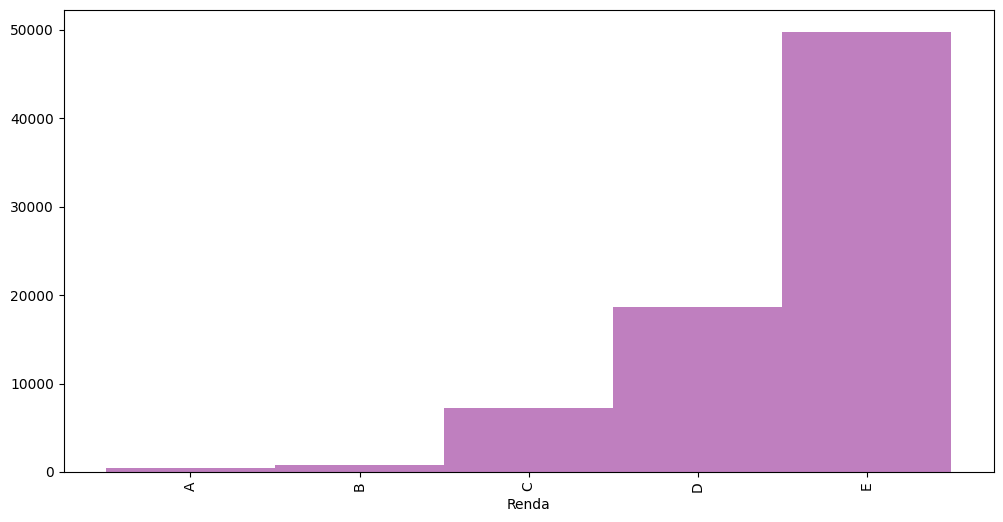

In [12]:
distribuicao_frequencia['Frequencia Absoluta'].plot.bar(width=1.0, color='purple', alpha=0.5, figsize=(12, 6))

> ### Conclusões
A frequência dos dados para as categorias A e B são extremamente baixas comparadas as demais categorias.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/tmp/ipykernel_6129/2709818949.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Idade, bins=10)


'\nComentários sobre o histograma para a variável quantitativa Idade \n-> Possui assimetria a direita\n-> Moda < Mediana < Média\n'

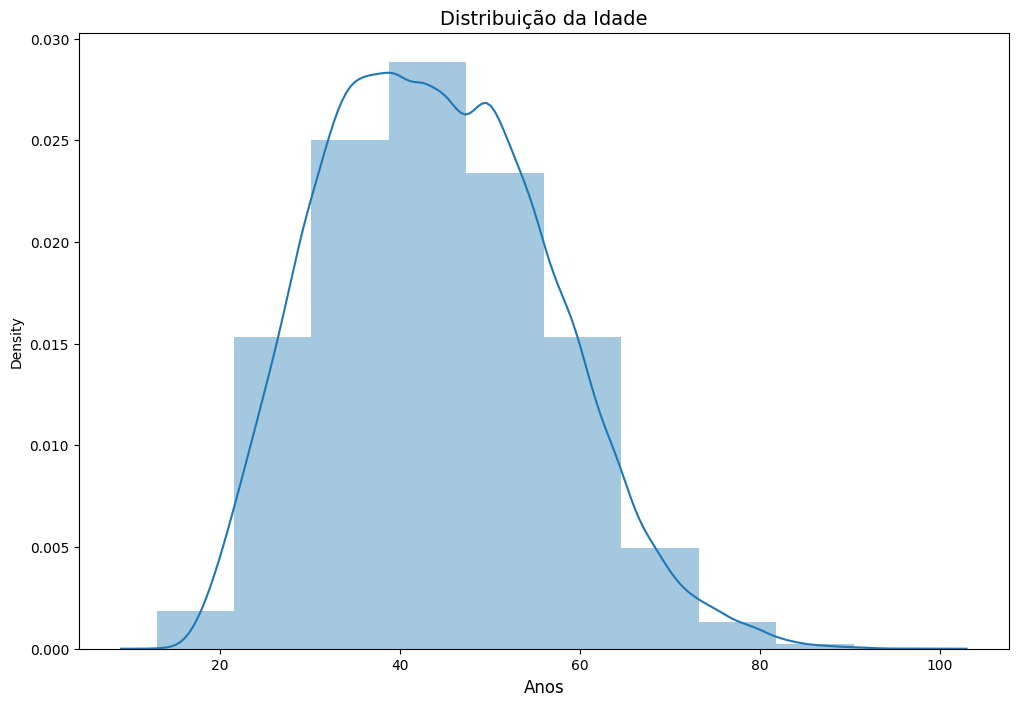

In [13]:
ax = sns.distplot(dados.Idade, bins=10)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Idade", fontsize=14)
ax.set_xlabel("Anos", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Idade 
-> Possui assimetria a direita
-> Moda < Mediana < Média
"""

/tmp/ipykernel_6129/1361480762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query("Renda < 10000").Renda)


'\nComentários sobre o histograma para a variável quantitativa Renda \n-> Possui assimetria a direita\n-> Moda < Mediana < Média\n\nA coluna Frequência Relativa na tabela distribuicao_frequencia mostra que mais de\n80% dos dados correspondem as categorias D e E. O que significa que a maior parte\ndas pessoas da nossa amostra possuem renda inferior a 5 salários mínimos, enquanto\numa pequena parcela possui salários acima deste valor. São os indivíduos das outras\ncategorias, principalmente B e A, que "puxam" a distribuição a direita em direção\nao crescimento da Renda.\n'

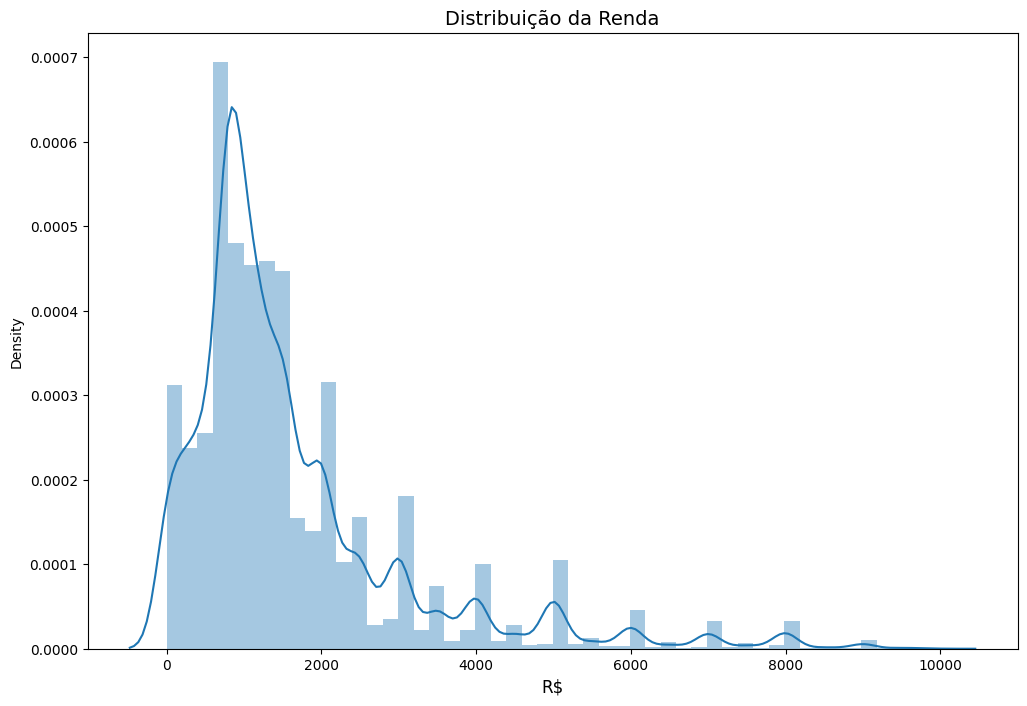

In [14]:
ax = sns.distplot(dados.query("Renda < 10000").Renda)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Renda", fontsize=14)
ax.set_xlabel("R$", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Renda 
-> Possui assimetria a direita
-> Moda < Mediana < Média

A coluna Frequência Relativa na tabela distribuicao_frequencia mostra que mais de
80% dos dados correspondem as categorias D e E. O que significa que a maior parte
das pessoas da nossa amostra possuem renda inferior a 5 salários mínimos, enquanto
uma pequena parcela possui salários acima deste valor. São os indivíduos das outras
categorias, principalmente B e A, que "puxam" a distribuição a direita em direção
ao crescimento da Renda.
"""

/tmp/ipykernel_6129/375933257.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


'\nComentários sobre o histograma para a variável quantitativa Renda \n-> É sométrico\n-> Moda = Mediana = Média\n'

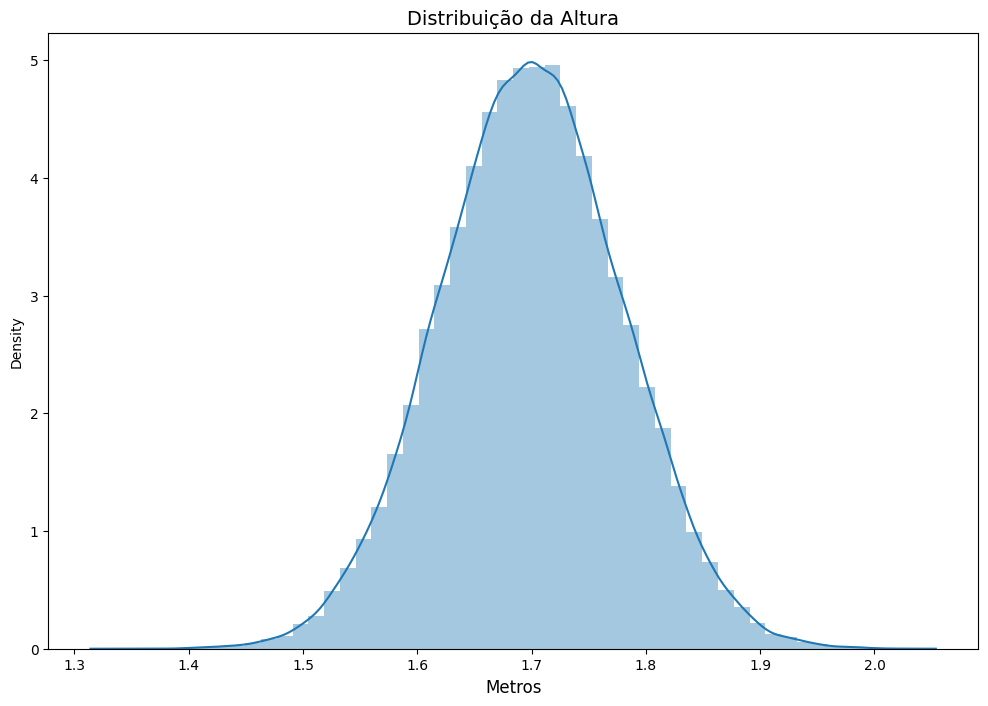

In [15]:
ax = sns.distplot(dados.Altura)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Altura", fontsize=14)
ax.set_xlabel("Metros", fontsize=12)
ax

"""
Comentários sobre o histograma para a variável quantitativa Renda 
-> É sométrico
-> Moda = Mediana = Média
"""

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/tmp/ipykernel_6129/626967102.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.query("Renda < 20000").Renda)


<Axes: title={'center': 'Distribuição da Renda'}, xlabel='R$', ylabel='Density'>

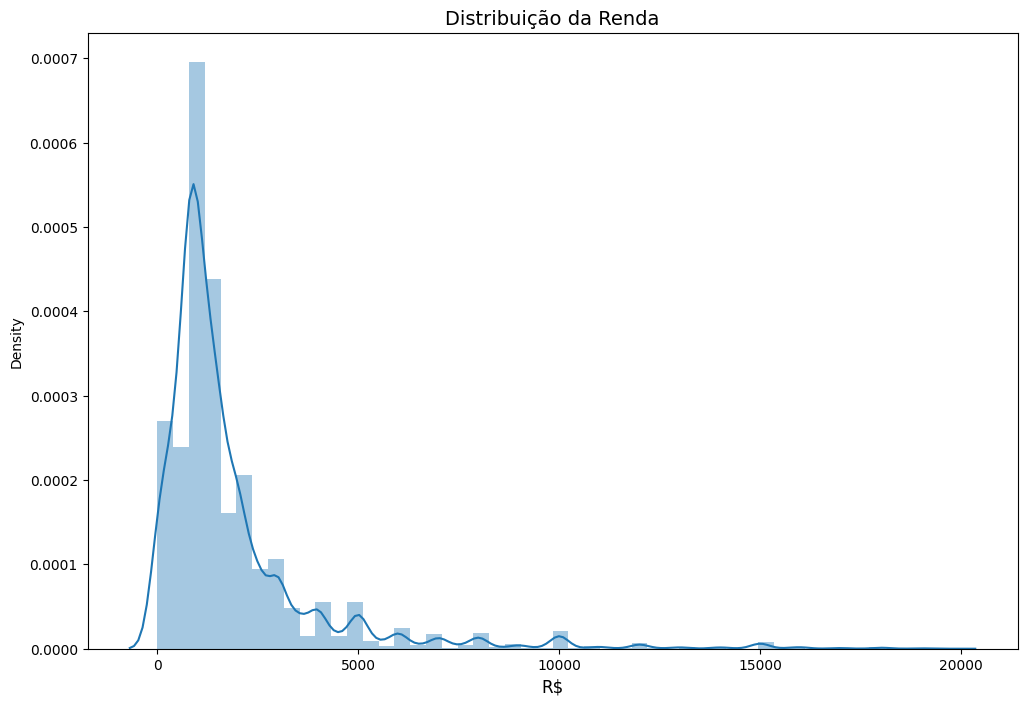

In [16]:
ax = sns.distplot(dados.query("Renda < 20000").Renda)
ax.figure.set_size_inches(12, 8)
ax.set_title("Distribuição da Renda", fontsize=14)
ax.set_xlabel("R$", fontsize=12)
ax

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [24]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [30]:
tabela_sexo_cor = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'])
tabela_sexo_cor.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor.rename(cor, axis=1, inplace=True)
tabela_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [31]:
tabela_sexo_cor = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'], normalize=True)
tabela_sexo_cor.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor.rename(cor, axis=1, inplace=True)
tabela_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


> ### Conclusões

Escreva suas conclusões aqui...

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [32]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [33]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [34]:
dados.Renda.mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [45]:
(dados.Renda - dados.Renda.mean()).abs().sum() / len(dados)

1526.4951371638058

### Obtenha a variância

In [48]:
(dados.Renda - dados.Renda.mean()).pow(2).sum() / (len(dados) - 1)

11044906.006217021

In [47]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [49]:
np.sqrt((dados.Renda - dados.Renda.mean()).pow(2).sum() / (len(dados) - 1))

3323.3877303464037

In [50]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [52]:
tabela_sexo_cor_renda = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'], aggfunc={'mean', 'median', 'max'}, values=dados['Renda'])
tabela_sexo_cor_renda.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor_renda.rename(cor, axis=1, inplace=True)
tabela_sexo_cor_renda

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

A renda para o sexo femino costuma ser inferior a apresenta por homens para todas as cores e raças. 
Mulheres negras possuem renda média aproximadamente 2x menor que mulheres brancas.
Fato curioso: Mulher indígena com renda 120k (Único caso em que a renda feminina é maior que a masculina)

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [54]:
tabela_sexo_cor_renda = pd.crosstab(index=dados['Sexo'], columns=dados['Cor'], aggfunc={'var', 'std'}, values=dados['Renda'])
tabela_sexo_cor_renda.rename(sexo, axis=0, inplace=True)
tabela_sexo_cor_renda.rename(cor, axis=1, inplace=True)
tabela_sexo_cor_renda

std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Os dados correspondentes ao sexo femino possuem menor dispersão comparado ao masculino.
No caso de mulheres negras, temos o desvio padrão de 1349, sendo um dos menores desvios
na nossa tabela cruzada sexo e cor em relação a renda. O que indica que os dados para 
essas categorias estão próximos, não havendo tantos casos destoantes.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

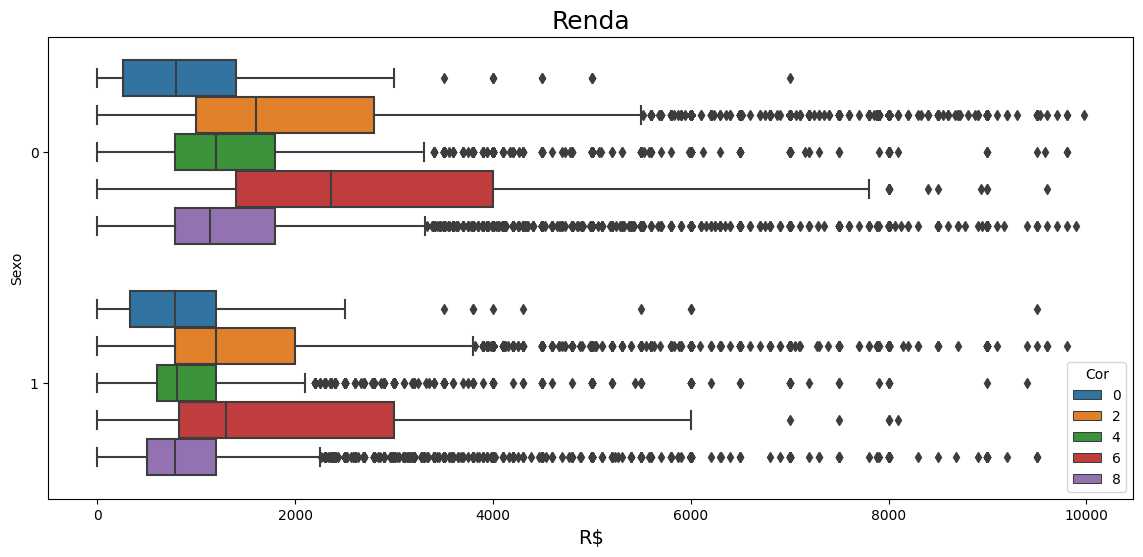

In [63]:
ax = sns.boxplot(x='Renda', y='Sexo', hue='Cor', data=dados.query("Renda < 10000 "), orient='h')
ax.figure.set_size_inches(14, 6)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

> ### Conclusões

Todos são assimétricos a direita
A mediana dos homens amarelos é a maior
25% dos homens amarelos possuem renda acima de R$ 4000,00
75% das mulheres negras possuem renda inferior a R$ 2000,00


# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [75]:
from scipy import stats

print('O percentual de pessoas que ganham um salário mínimo ou menos é de %d%%' % stats.percentileofscore(dados['Renda'], sm, kind='weak'))


O percentual de pessoas que ganham um salário mínimo ou menos é de 28%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [76]:
dados.Renda.quantile([i / 100 for i in range(1, 100)])

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [78]:
tabela_sexo_estudos_renda = pd.crosstab(index=dados['Sexo'], columns=dados['Anos de Estudo'], aggfunc={'mean', 'median', 'max', 'std'}, values=dados['Renda'])
tabela_sexo_estudos_renda.rename(sexo, axis=0, inplace=True)
tabela_sexo_estudos_renda.rename(anos_de_estudo, axis=1, inplace=True)
tabela_sexo_estudos_renda

max                              \
Anos de Estudo Sem instrução e menos de 1 ano  1 ano 2 anos 3 anos 4 anos   
Sexo                                                                        
Masculino                               30000  30000  40000  80000  50000   
Feminino                                10000   2000   4000   3500  10000   

                                                   ...          std  \
Anos de Estudo 5 anos 6 anos 7 anos 8 anos 9 anos  ...       7 anos   
Sexo                                               ...                
Masculino       35000  25000  40000  30000  60000  ...  1419.708673   
Feminino         8000   6000   9000  18000  20000  ...   602.038029   

                                                                    \
Anos de Estudo       8 anos       9 anos      10 anos      11 anos   
Sexo                                                                 
Masculino       1515.583715  2137.664774  2078.609734  2676.538942   
Feminino         896.781213   973.221652   620.611907  1819.040417   

                                                                       \
Anos de Estudo      12 anos      13 anos      14 anos 15 anos ou mais   
Sexo                                                                    
Masculino       2268.081538  2797.116800  3987.214974     7447.613594   
Feminino        4851.833513  2053.789771  2064.083336     4212.770709   

                                 
Anos de Estudo Não determinados  
Sexo                             
Masculino            979.648745  
Feminino             459.985964  

[2 rows x 68 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='Sexo'>

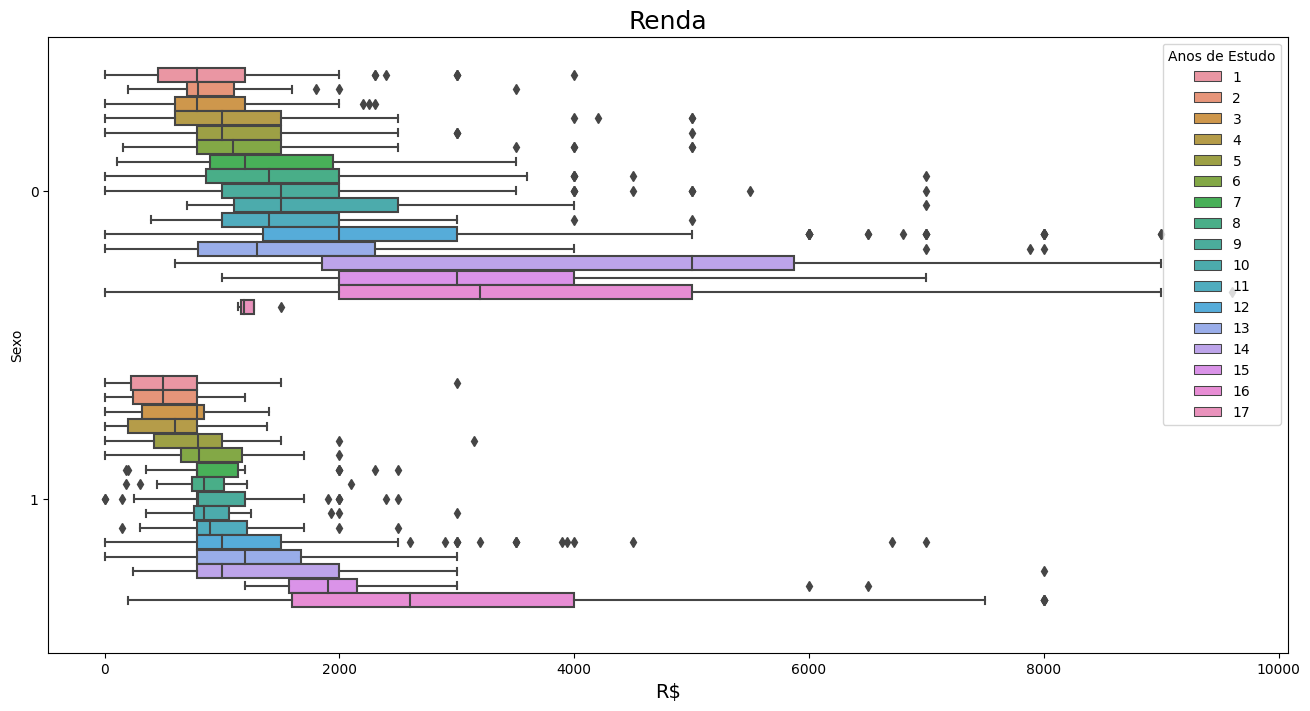

In [82]:
ax = sns.boxplot(x='Renda', y='Sexo', hue='Anos de Estudo', data=dados.query("Renda < 10000 and Idade==50"), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [83]:
dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<Axes: title={'center': 'Renda'}, xlabel='R$', ylabel='UF'>

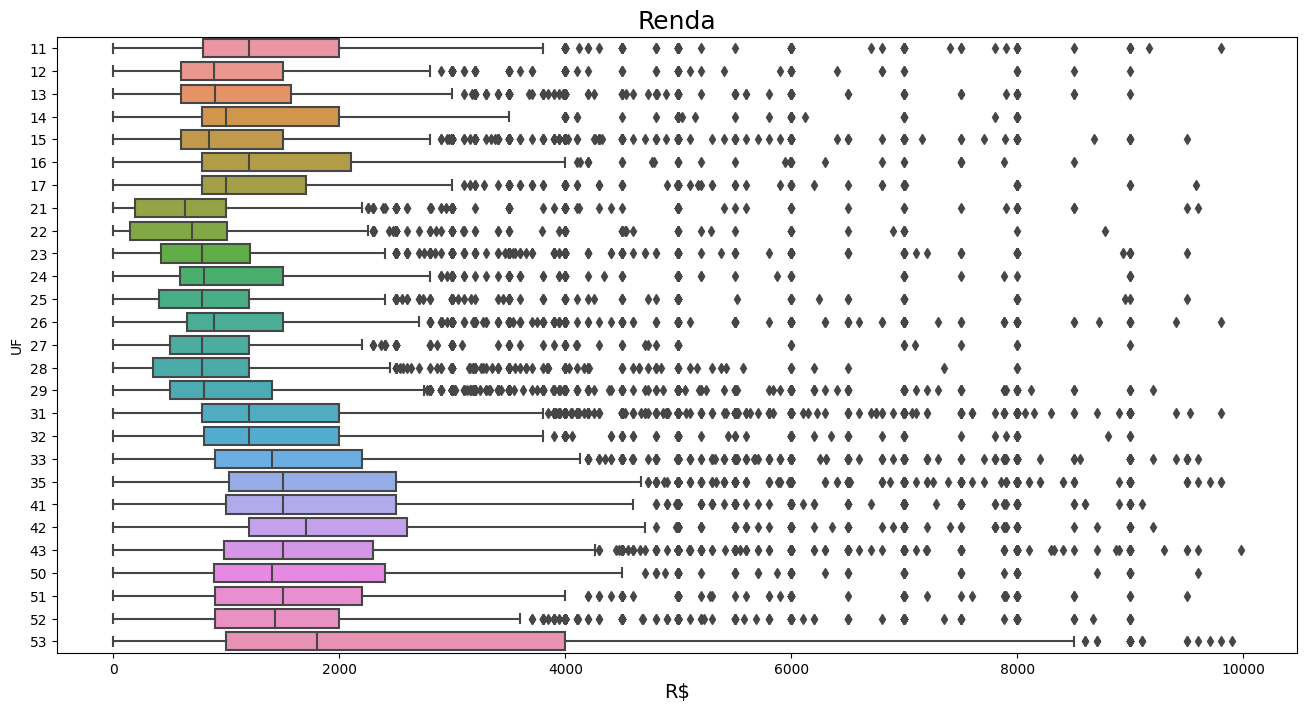

In [84]:
ax = sns.boxplot(x='Renda', y='UF', data=dados.query("Renda < 10000"), orient='h')
ax.figure.set_size_inches(16, 8)
ax.set_title("Renda", fontsize=18)
ax.set_xlabel("R$", fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...